In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from poles_roots.plotting import phase_plot, plot_poles_zeros
from poles_roots import reference_problems
plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

In [2]:
z = np.exp(1j*2*np.pi*np.linspace(0,1, num=100))

/tmp/ipykernel_33509/1922147316.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figures/AAA_pole_zero.pdf")


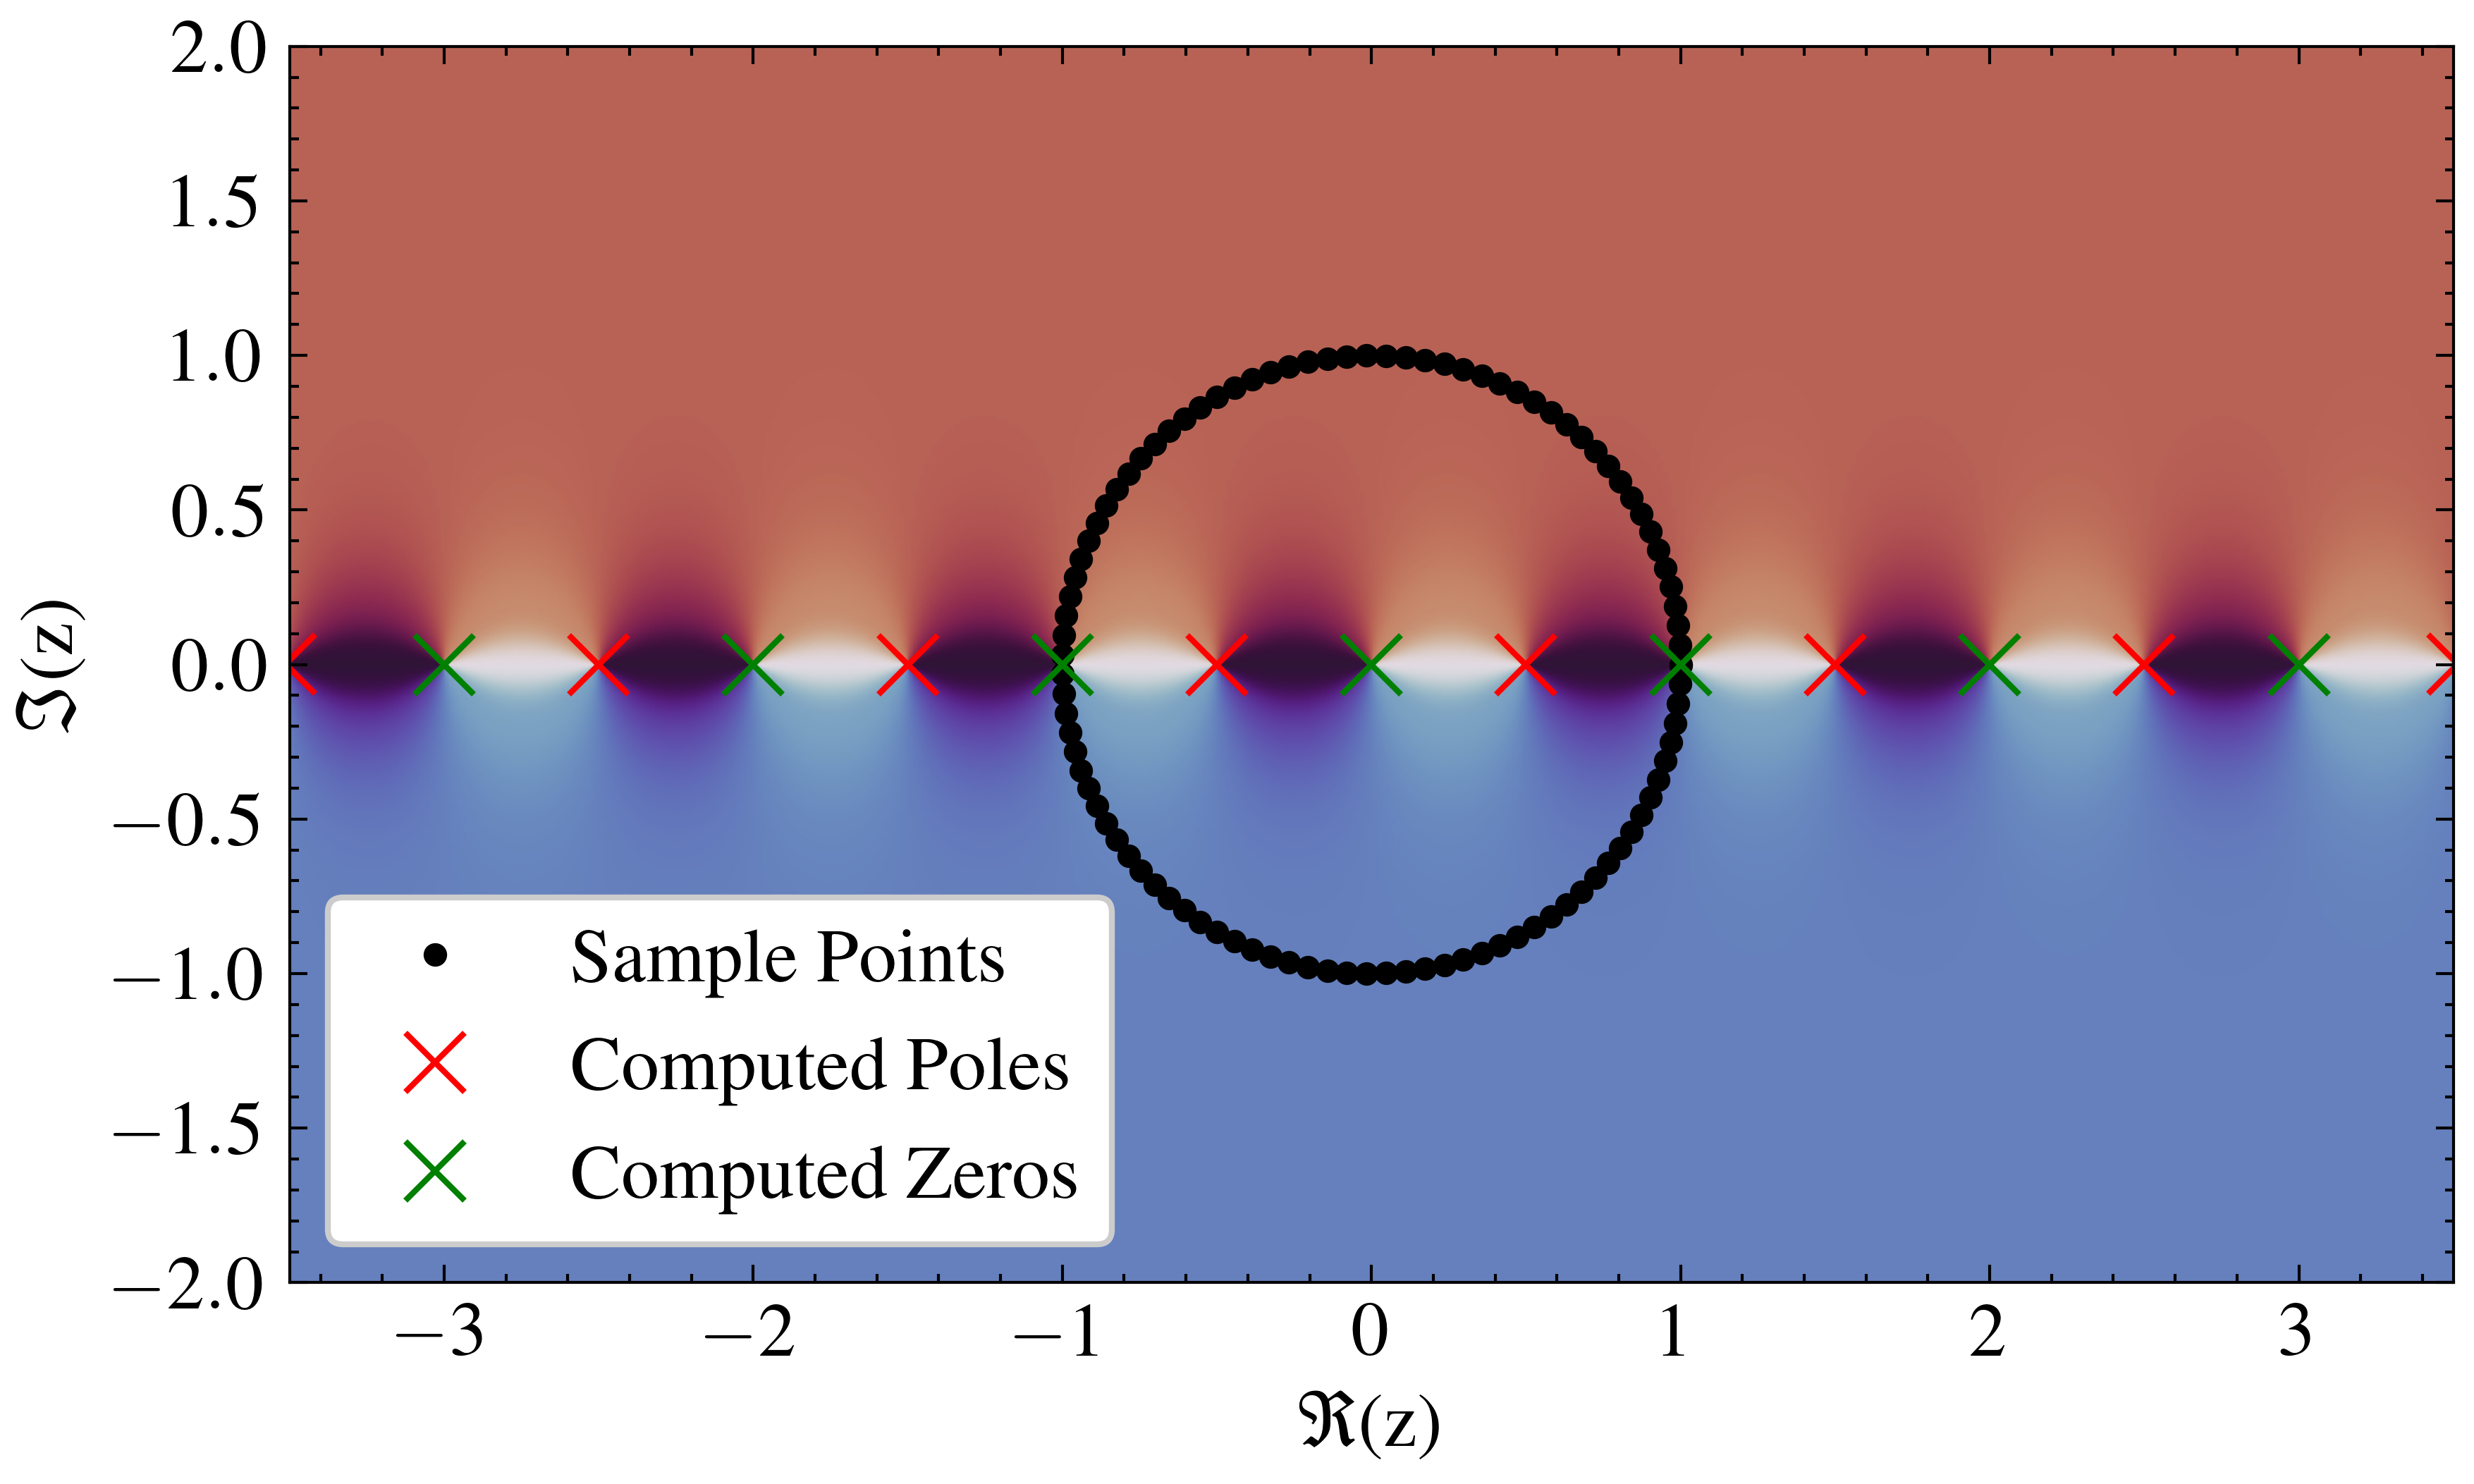

In [3]:
r = AAA(np.tan(z*np.pi), z)
fig, ax = plt.subplots(figsize=(6.6, 5))
ax.set_aspect('equal', 'box')
phase_plot(r, ax, domain=[-3.5, 3.5, -2, 2])
ax.plot(z.real, z.imag, '.', label="Sample Points")
plot_poles_zeros(r, ax)
ax.legend(facecolor='white', framealpha=1, frameon=True)
plt.savefig("figures/AAA_pole_zero.pdf")


/tmp/ipykernel_33509/1998823943.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figures/AAA_spurious_zero.pdf")


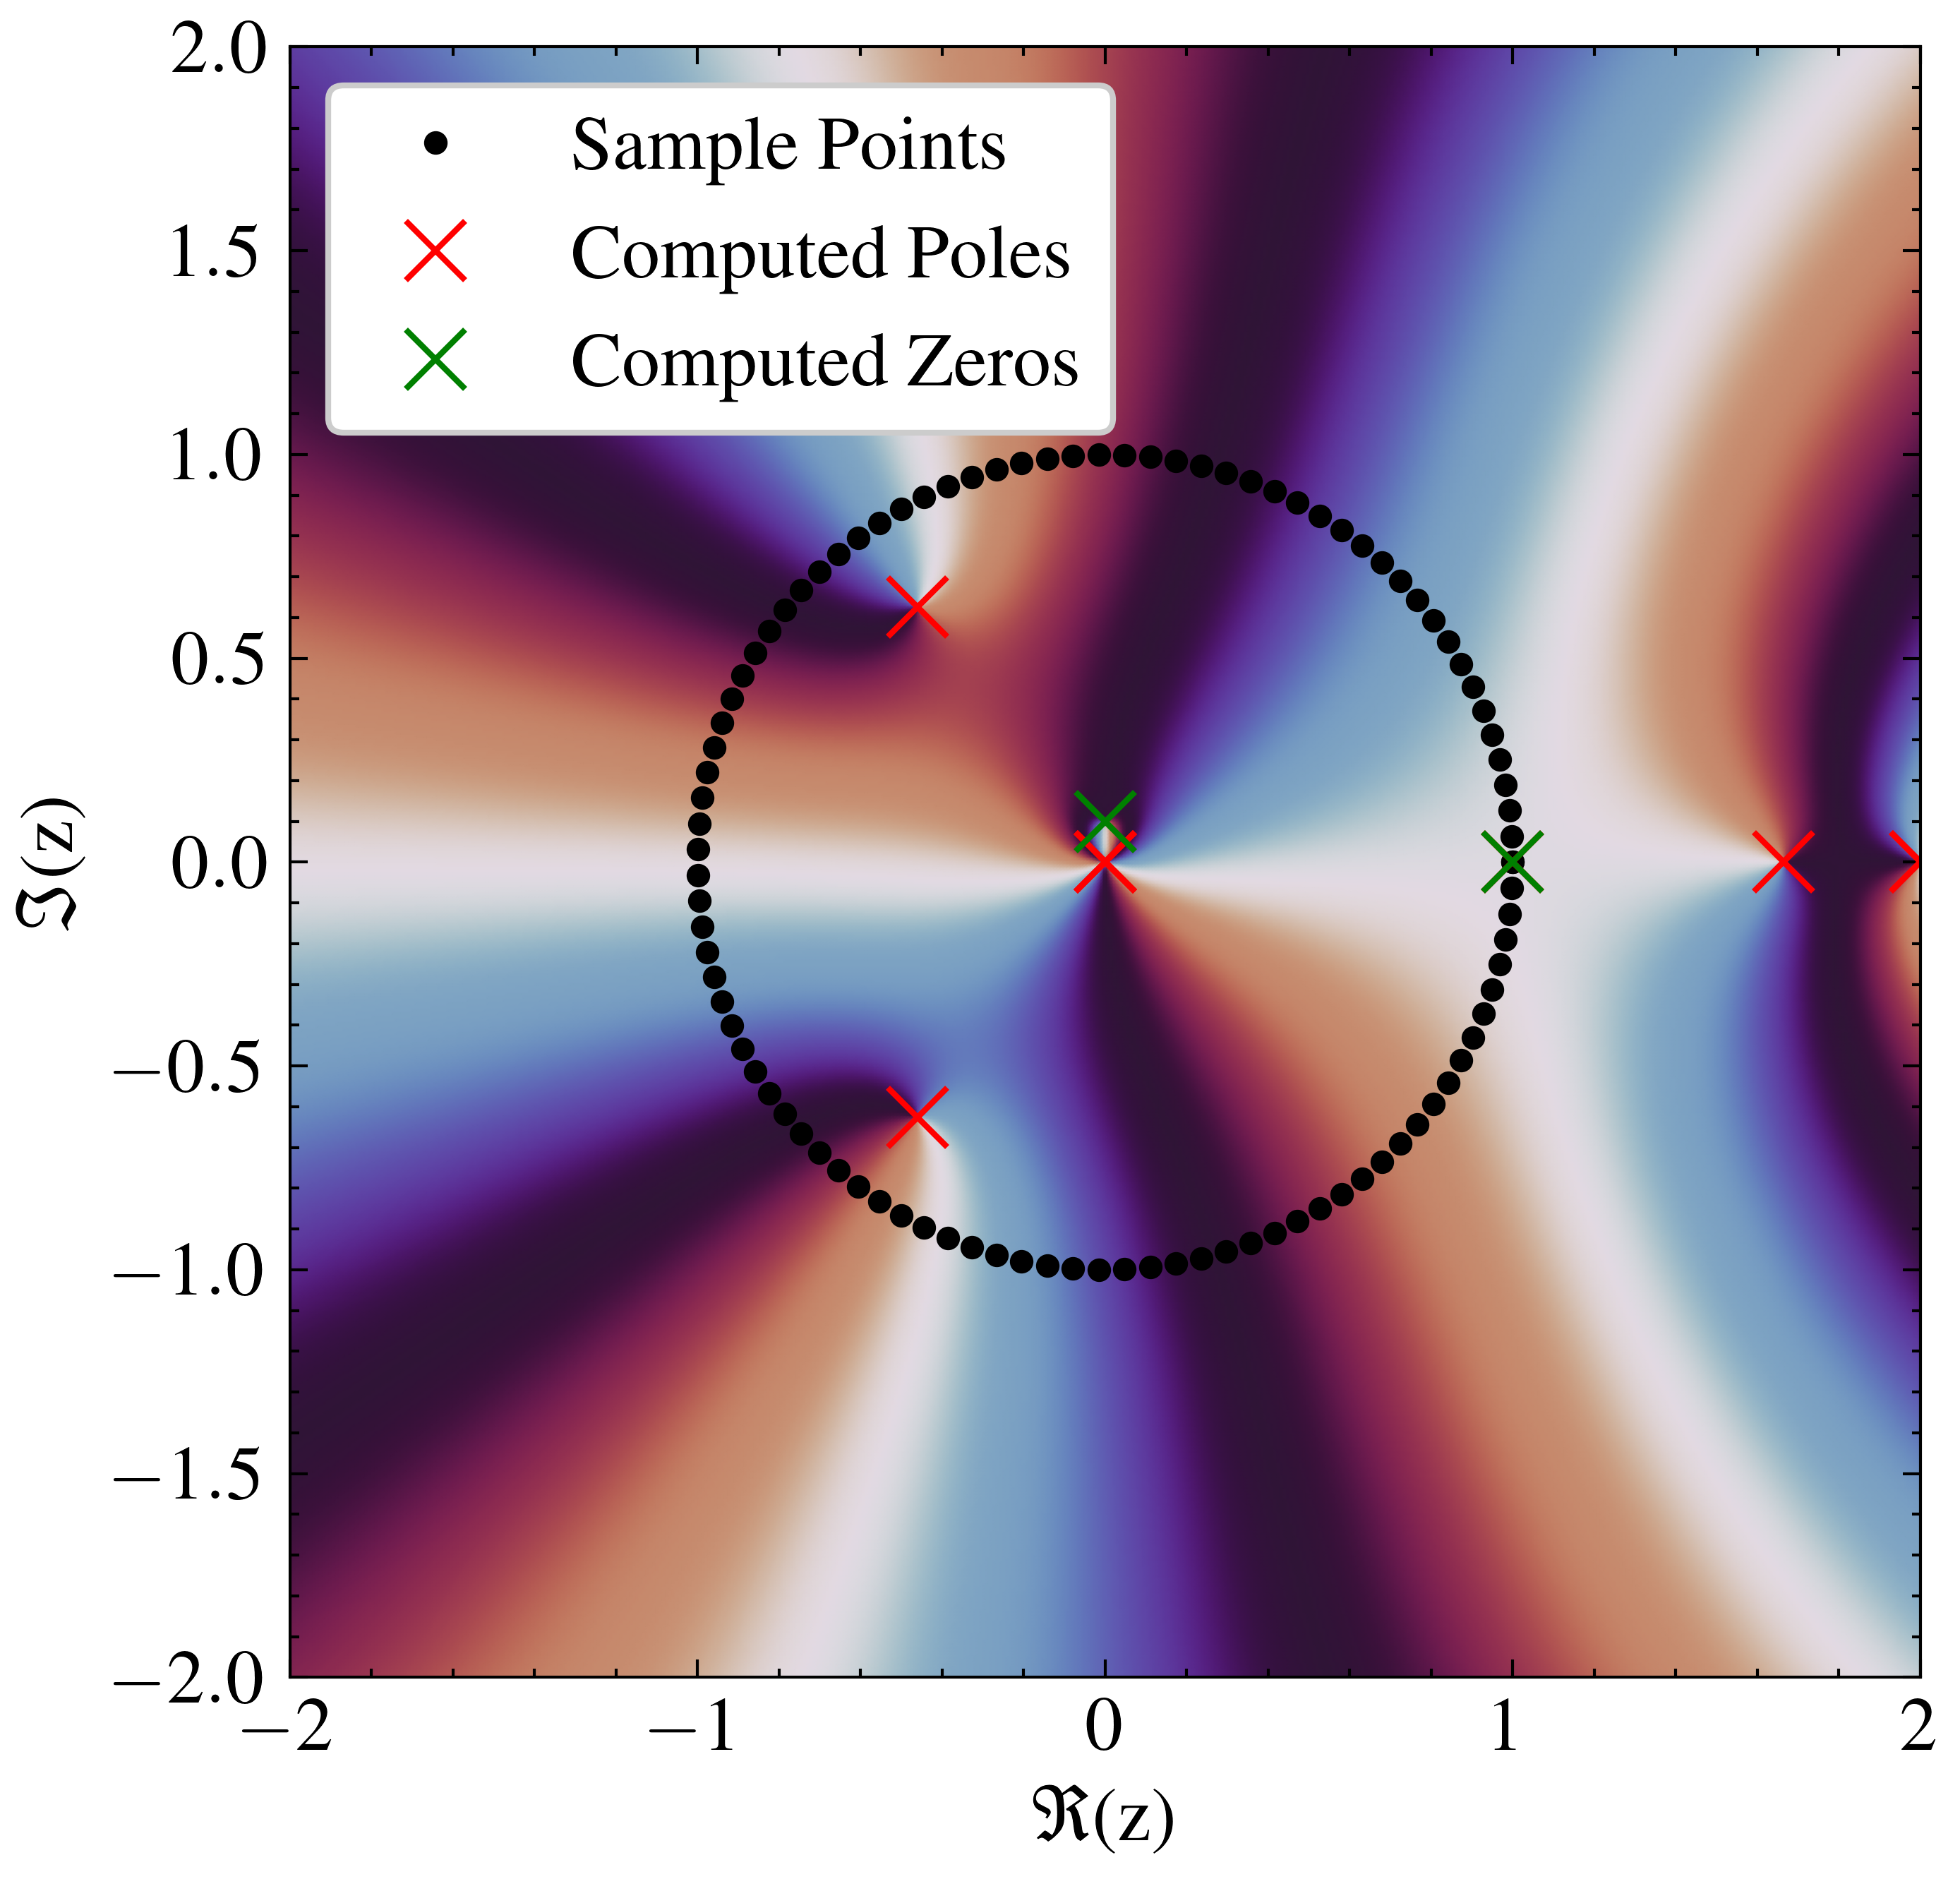

In [4]:
r = AAA((z-0.1j)/reference_problems.func4(z), z)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal', 'box')
phase_plot(r, ax, domain=[-2, 2, -2, 2])
ax.plot(z.real, z.imag, '.', label="Sample Points")
plot_poles_zeros(r, ax)
ax.legend(facecolor='white', framealpha=1, frameon=True)
plt.savefig("figures/AAA_spurious_zero.pdf")


In [16]:
f = lambda z: (z-0.1j)/reference_problems.func4(z)

In [17]:
np.sort(r.roots)

array([-1.13696504e+01+4.95068654e+00j, -1.13179007e+01-5.01873010e+00j,
       -3.04466487e+00+6.37242030e+00j, -3.02298618e+00-6.44215575e+00j,
       -5.02191900e-14+1.00000000e-01j,  1.00000000e+00-5.13094946e-16j,
        2.49242574e+00-5.63814931e+00j,  2.52236673e+00+5.63174248e+00j,
        3.95689910e+00-4.19806064e+00j,  4.01515574e+00+4.18541580e+00j,
        4.95337465e+00-2.58407097e+00j,  5.06834078e+00+2.54075767e+00j,
        5.51900659e+00-2.75245897e-01j,  6.96083457e+00+7.24166995e-01j])

In [18]:
f(1.00000000e+00-4.47506550e-16j)

(0.317374368085213-0.03173743680852126j)

In [19]:
r(1.00000000e+00-4.47506550e-16j)

array(0.31737437-0.03173744j)

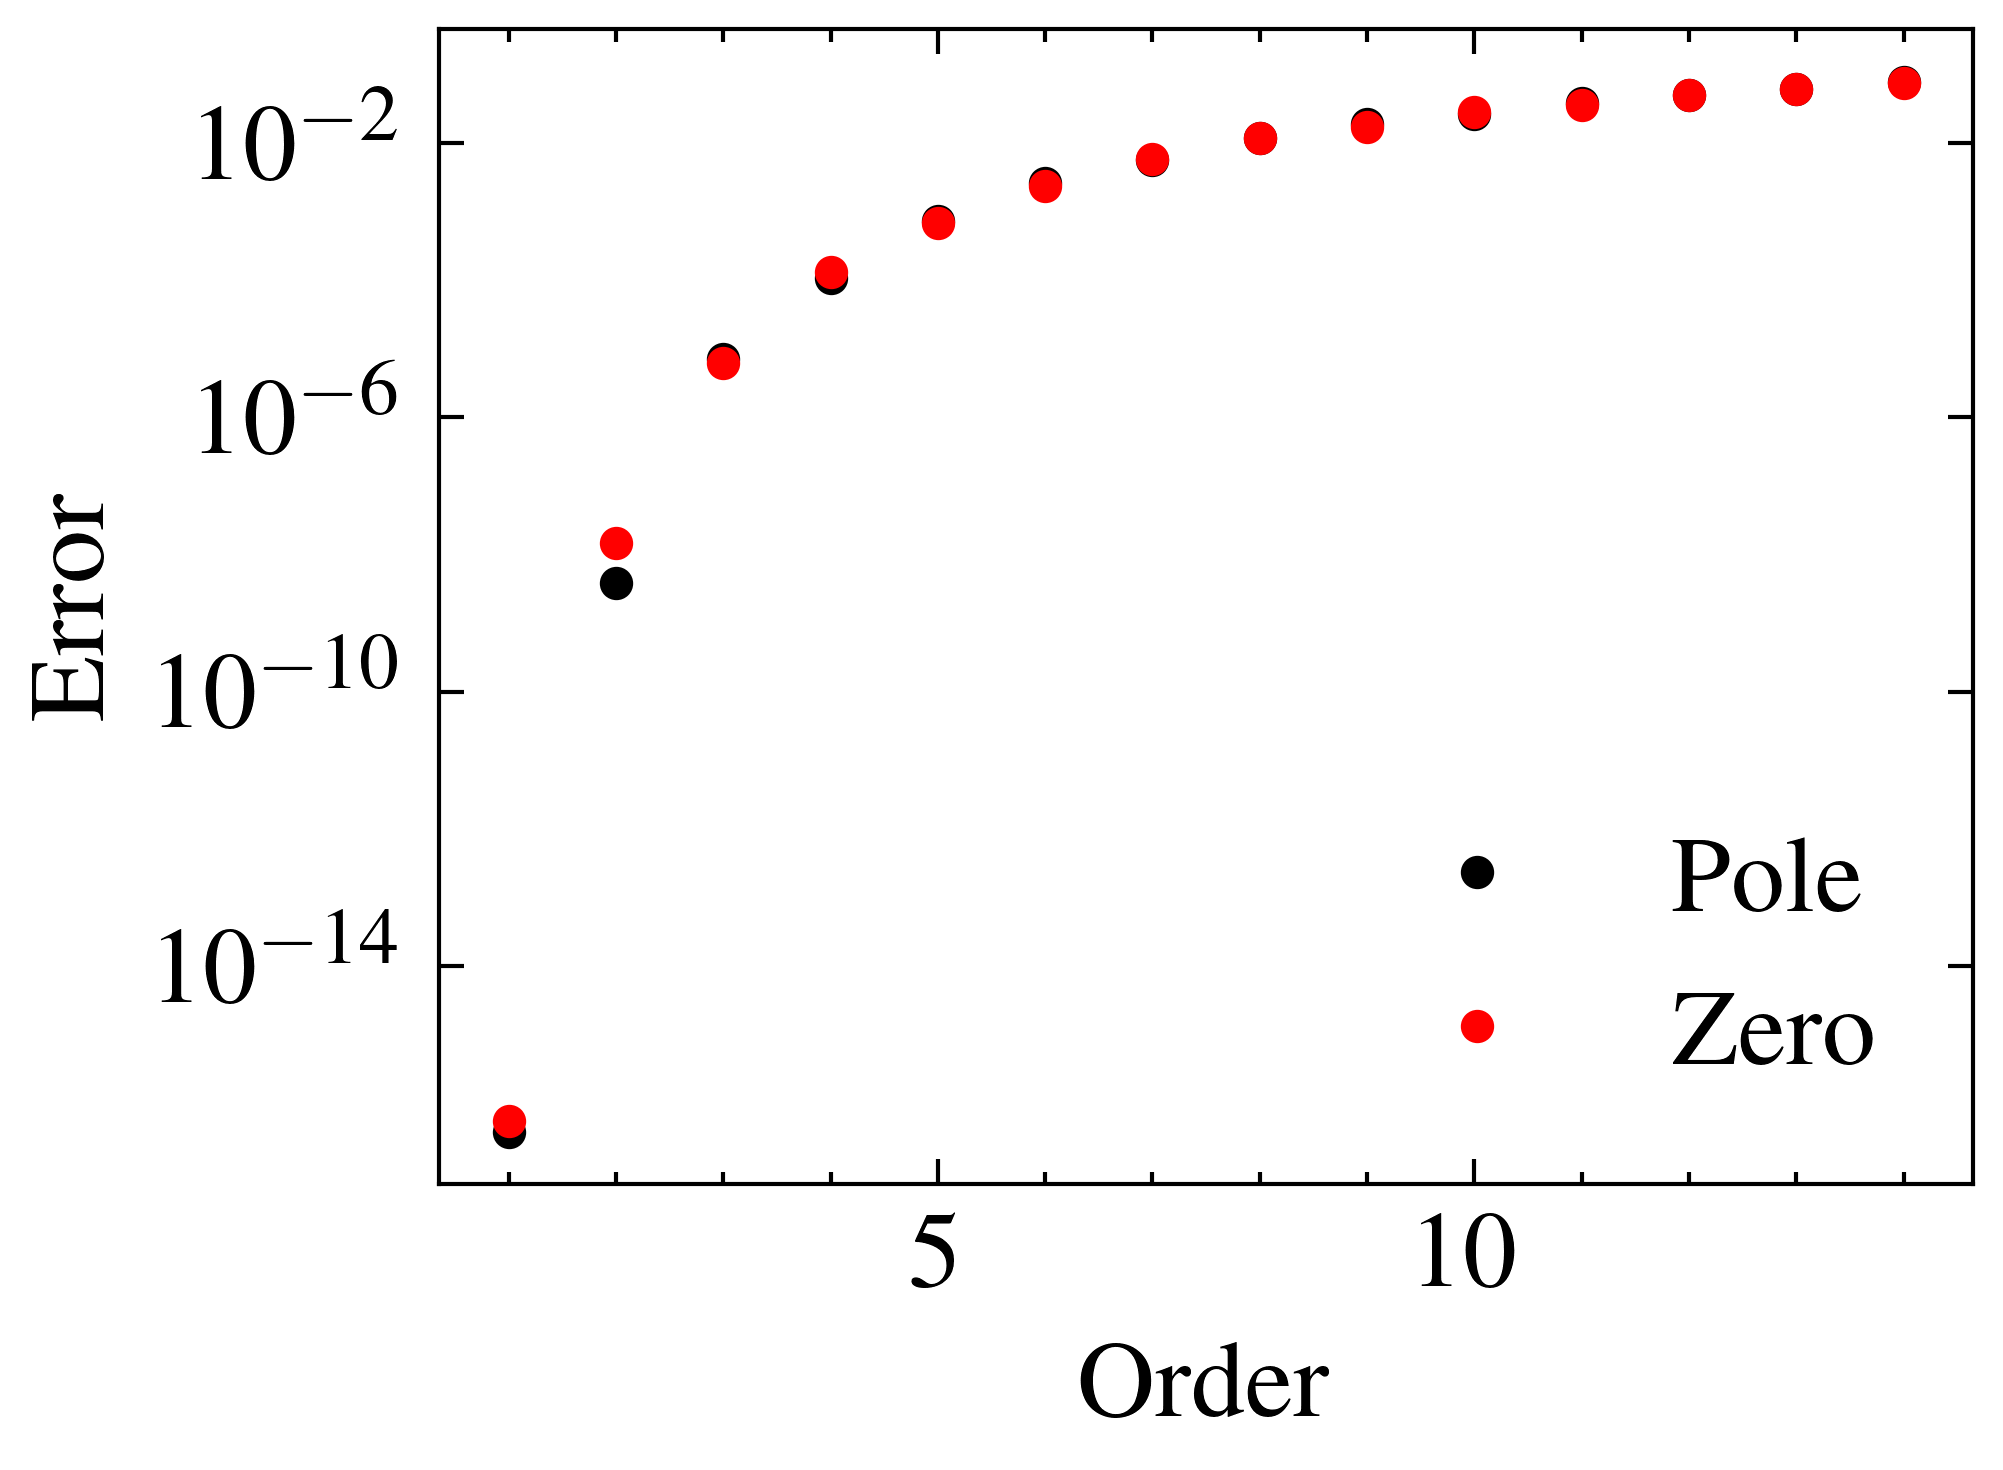

In [20]:
pole_errors = []
root_errors = []
orders = range(1,15)
for order in orders:
    def f_pole(z):
        return z**(-order)
    
    def f_root(z):
        return z**order
    
    pole_errors.append(np.min(np.abs(AAA(f_pole(z), z).poles)))
    root_errors.append(np.min(np.abs(AAA(f_root(z), z).roots)))
    
fig, ax = plt.subplots()
ax.plot(orders, pole_errors, '.', label="Pole")
ax.plot(orders, root_errors, '.', label="Zero")
ax.set_yscale('log')
ax.set_xlabel("Order")
ax.set_ylabel("Error")
ax.legend()
plt.savefig("figures/AAA_order.pdf")